# A/B testing for an online store

In this project I will show part of the work that I did together with the marketing department of an online flower shop. My tasks included: analyzing the proposed hypotheses using the ICE and RISE methods, as well as analyzing the results of A/B testing for one of the hypotheses.

**Data description**

Data for testing hypotheses

File /datasets/hypothesis.csv.
- Hypothesis — brief description of the hypothesis;
- Reach — user reach on a 10-point scale;
- Impact — influence on users on a 10-point scale;
- Confidence — confidence in the hypothesis on a 10-point scale;
- Efforts — resource costs for testing the hypothesis on a 10-point scale. The higher the Efforts value, the more expensive the hypothesis testing.

Data for conducting an A/B test

File /datasets/orders.csv. 
- transactionId — order identifier;
- visitorId — identifier of the user who placed the order;
- date — date when the order was made;
- revenue — order revenue;
- group — A/B test group the order was in.

File /datasets/visitors.csv.
date — date;
group — A/B test group;
visitors — number of users on the specified date in the specified A/B test group

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt
import plotly.express as px 
from plotly import graph_objects as go 
from scipy import stats as st

## Prioritization of hypotheses.
We have 9 hypotheses for increasing the revenue of an online store with the specified parameters Reach, Impact, Confidence, Effort. Next, I will apply the ICE and RICE frameworks to prioritize the hypotheses, and also examine the changes.


In [2]:
from io import BytesIO
import requests
spreadsheet_id = '1Vj-t1cy4Z17Jb_1TmmGj5V-edoJ3Eym_rxkm0evoIw0'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
hyp = pd.read_csv(BytesIO(r.content))

In [3]:
pd.options.display.max_colwidth = 1
display(hyp)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Add two new traffic acquisition channels, which will allow you to attract 30% more users",3,10,8,6
1,"\nLaunch your own delivery service, which will reduce the delivery time of orders",2,5,4,10
2,Add product recommendation blocks to your online store website to increase conversion and average order value,8,3,7,3
3,"Change the category structure, which will increase conversion, as users will find the desired product faster",8,3,3,8
4,Change Homepage Background Color to Increase User Engagement,3,1,1,1
5,Add a customer feedback page for the store to increase the number of orders,3,2,2,3
6,Display banners with current promotions and sales on the main page to increase conversion,5,3,8,3
7,Add a subscription form to all your main pages to build your customer base for email newsletters,10,7,8,5
8,Launch a promotion that gives a discount on a product on your birthday,1,9,9,5


In [4]:
hyp['ICE'] = (hyp['Impact'] * hyp['Confidence'])/hyp['Efforts']
hyp['ICE'] = hyp['ICE'].round(3)
pd.options.display.max_colwidth = 1
display(hyp[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,Launch a promotion that gives a discount on a product on your birthday,16.200
0,"Add two new traffic acquisition channels, which will allow you to attract 30% more users",13.333
7,Add a subscription form to all your main pages to build your customer base for email newsletters,11.200
6,Display banners with current promotions and sales on the main page to increase conversion,8.000
2,Add product recommendation blocks to your online store website to increase conversion and average order value,7.000
1,"\nLaunch your own delivery service, which will reduce the delivery time of orders",2.000
5,Add a customer feedback page for the store to increase the number of orders,1.333
3,"Change the category structure, which will increase conversion, as users will find the desired product faster",1.125
4,Change Homepage Background Color to Increase User Engagement,1.000


In [5]:
hyp['RICE'] = (hyp['Impact'] * hyp['Confidence']*hyp['Reach'])/hyp['Efforts']
hyp['RICE'] = hyp['RICE'].round(3)
pd.options.display.max_colwidth = 1 # напишите ваш код здесь
display(hyp[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,Add a subscription form to all your main pages to build your customer base for email newsletters,112.0
2,Add product recommendation blocks to your online store website to increase conversion and average order value,56.0
0,"Add two new traffic acquisition channels, which will allow you to attract 30% more users",40.0
6,Display banners with current promotions and sales on the main page to increase conversion,40.0
8,Launch a promotion that gives a discount on a product on your birthday,16.2
3,"Change the category structure, which will increase conversion, as users will find the desired product faster",9.0
1,"\nLaunch your own delivery service, which will reduce the delivery time of orders",4.0
5,Add a customer feedback page for the store to increase the number of orders,4.0
4,Change Homepage Background Color to Increase User Engagement,3.0


## Conclusion
When using the ICE framework, the leaders are hypotheses eight, zero and seven. When using the 'RICE' framework, the top three are hypotheses 7, 2 and 0. Hypothesis 2 is higher in the RICE framework because it has a high Reach value (as well as 7 and 0), but the eighth hypothesis is out of the top three - it has a very low Reach value.

## A/B test analysis

### Data overview

In [6]:
from io import BytesIO
import requests
spreadsheet_id = '1be-KzBtgOeM_yWwZsWsRRAR8VGJgzSPEjnCxMivA-b4'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
orders = pd.read_csv(BytesIO(r.content))

In [7]:
from io import BytesIO
import requests
spreadsheet_id = '1Gd80rjkKtzUJOl1IAUHLGePjEngCXBZPXvMEh7EiqaU'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
visitors = pd.read_csv(BytesIO(r.content))

In [8]:
print(orders.head(5))
print(visitors.head(5))

   transactionId   visitorId        date  revenue group
0  3667963787     3312258926  2019-08-15  1650     B   
1  2804400009     3642806036  2019-08-15  730      B   
2  2961555356     4069496402  2019-08-15  400      A   
3  3797467345     1196621759  2019-08-15  9759     B   
4  2282983706     2322279887  2019-08-15  2308     B   
         date group  visitors
0  2019-08-01  A     719     
1  2019-08-02  A     619     
2  2019-08-03  A     507     
3  2019-08-04  A     717     
4  2019-08-05  A     756     


In [9]:
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [10]:
orders ['date'] = pd.to_datetime (orders ['date'], infer_datetime_format=True)
visitors ['date'] = pd.to_datetime (visitors ['date'], infer_datetime_format=True)
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


/var/folders/3w/djhb641n4kv_gm7fb04b71l00000gn/T/ipykernel_76853/2385982033.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  orders ['date'] = pd.to_datetime (orders ['date'], infer_datetime_format=True)
/var/folders/3w/djhb641n4kv_gm7fb04b71l00000gn/T/ipykernel_76853/2385982033.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  visitors ['date'] = pd.to_datetime (visitors ['date'], infer_datetime_format=True)


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

In [11]:
print('Duplicates:')
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

print ()
print('Missing values:')
display(orders.isna().sum())
display(visitors.isna().sum())



Duplicates:


0

0


Missing values:


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [12]:
orders_grouped = orders.pivot_table(index =['visitorId'], columns = 'group',values = 'transactionId',aggfunc='count').sort_values(by =['A','B'], ascending=False).reset_index()
orders_grouped

group,visitorId,A,B
0,4256040402,7.0,4.0
1,2458001652,5.0,6.0
2,2038680547,5.0,3.0
3,2378935119,4.0,5.0
4,199603092,4.0,1.0
...,...,...,...
1026,4251115836,NaN,1.0
1027,4258103007,NaN,1.0
1028,4279090005,NaN,1.0
1029,4281247801,NaN,1.0


In this section, A/B tests data were loaded and checked - the data type of the date columns was corrected, duplicates and missing values were checked. The orders table contains users who fell into both groups, since these users have already fallen into the visitors table in aggregated form, it will be difficult to extract them, so we leave everything in its original form.

In [13]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
        'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


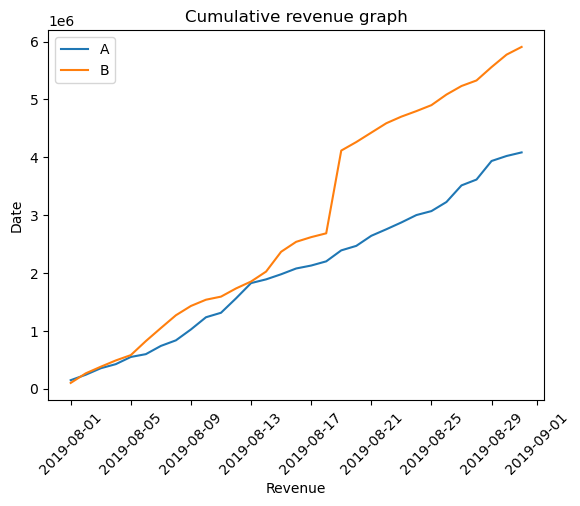

In [14]:
#cumulative revenue graph 
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]


cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')


plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Cumulative revenue graph')
plt.xlabel('Revenue')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Revenue increases almost uniformly throughout the test, but Group B has a sharp spike - this may signal outliers.

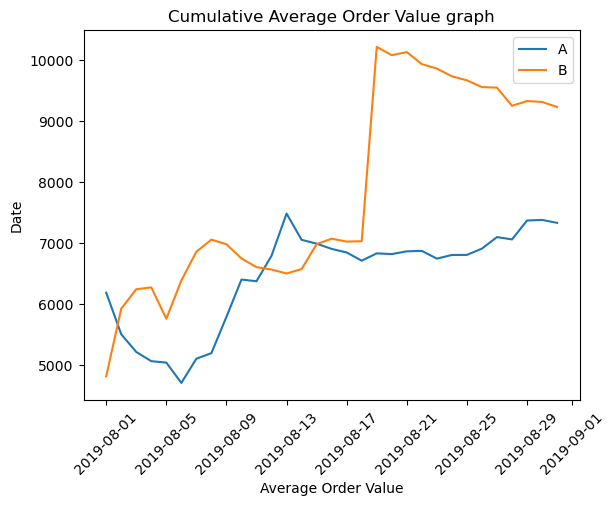

In [15]:
# cumulative Average Order Value graph
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Cumulative Average Order Value graph')
plt.xlabel('Average Order Value')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Average Order Value for group  А jumped at the beginning, but then stabilized. But in group B, again, a big surge is visible closer to the end.

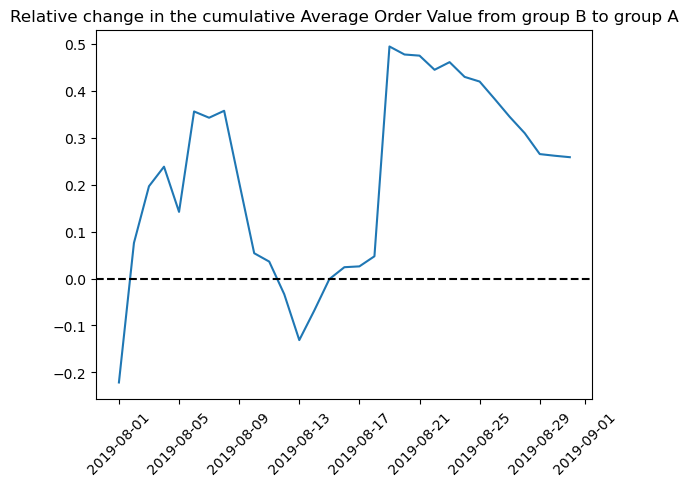

In [16]:
#relative change in the cumulative Average Order Value from group B to group A graph
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Relative change in the cumulative Average Order Value from group B to group A')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()



There are strong spikes at several points, which means there are outliers and large orders.

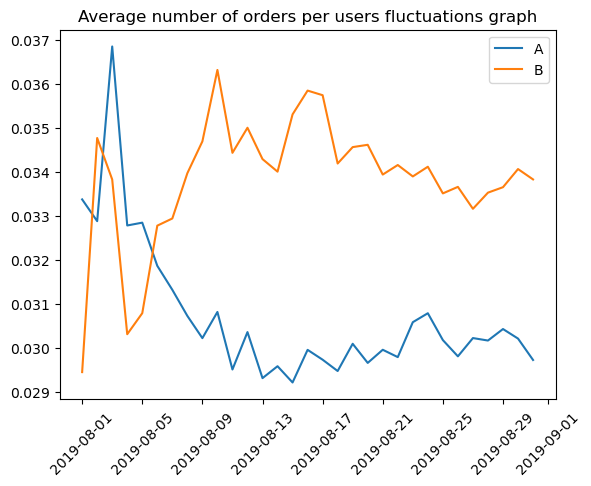

In [17]:
# calculate average number of orders per users
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


cumulativeDataA = cumulativeData[cumulativeData['group']=='A']


cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Average number of orders per users fluctuations graph')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Very strong fluctuations in both groups, especially at the beginning of the test, then the indicators of both groups level out.

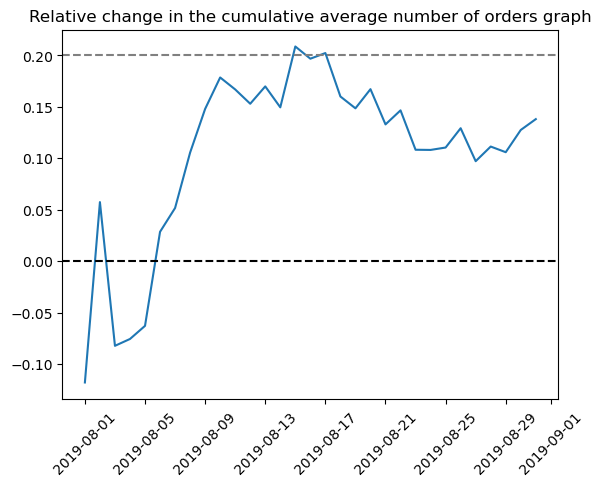

In [28]:
#relative change in the cumulative average number of orders per visitor from group B to group A
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.title('Relative change in the cumulative average number of orders graph')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.show()

Strong fluctuations are visible, especially at the beginning of the test - in general, the ratio of the average number of orders per visitor has not yet been established, and it is impossible to draw any conclusions from the test at this time.

          userId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


Text(0.5, 1.0, 'Scatter plot of number of orders by user')

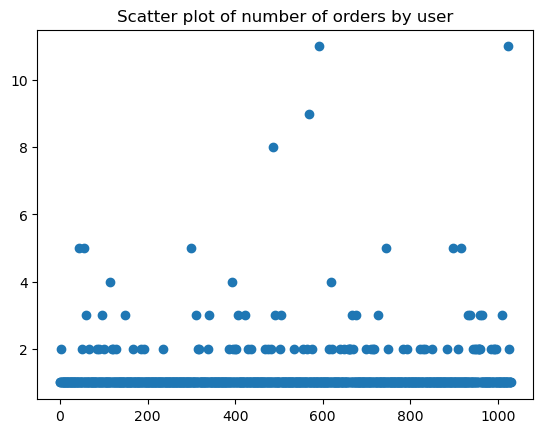

In [30]:
# Scatter plot of number of orders by user
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))


x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Scatter plot of number of orders by user')


In [31]:
#95th and 99th percentiles of orders per user
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


There are a number of outlier orders, let's select the boundary of abnormal orders at the 95th percentile - 2.

(0.0, 150000.0)

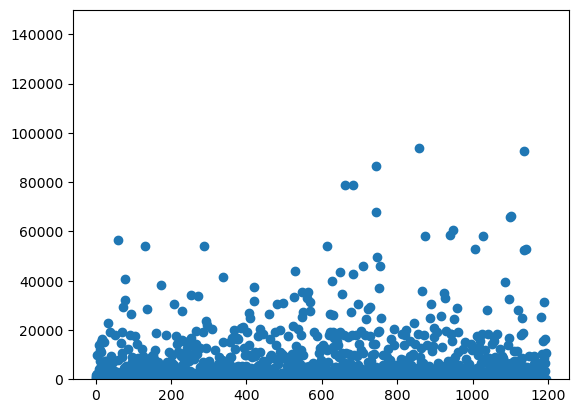

In [32]:
#scatter plot for revenues
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.ylim([0,150000])


In [22]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Again, there are several more expensive orders, let's choose the 28,000 limit.

In [33]:
# calculation the statistical significance of differences in the average number of orders per visitor between groups using raw data
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('transactionId', as_index=False)
    .agg({'visitorId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('transactionId', as_index=False)
    .agg({'visitorId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996         

Null hypothesis: There are no differences in the average number of orders per visitor between the groups

Alternative hypothesis: There are differences in the average number of orders per visitor between the groups

Statistical significance level - 95%

Mann-Whitney test

Conclusion: P-value is less than 0.05, so we reject the null hypothesis, there is a statistical difference. The relative increase in the average number of orders of group B to group A is 13.8%.

In [34]:
#calculate the statistical significance of differences in the average order value between groups using "raw" data
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


Null hypothesis: There are no differences in the average check per visitor between the groups

Alternative hypothesis: There are differences in the average check per visitor between the groups

Statistical significance level - 95%

Mann-Whitney test

Conclusion: P-value is greater than 0.05, so we do not reject the null hypothesis. The relative increase in the average number of orders of group B to group A is 25.9%.

In [35]:
#clean the data from abnormal users
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64


In [36]:
# calculation the statistical significance of differences in the average number of orders per visitor between groups using cleaned data
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01304
0.173


Null hypothesis: There are no differences in the average number of orders per visitor between the purified groups

Alternative hypothesis: There are differences in the average number of orders per visitor between the purified groups

Statistical significance level - 95%

Mann-Whitney test

Conclusion: P-value is less than 0.05, so we reject the null hypothesis, there is a statistical difference. The relative increase in the average number of orders of group B to group A is 17.3%.

In [37]:
#calculate the statistical significance of differences in the average order value between groups using cleaned data
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


Null hypothesis: There are no differences in the average check per visitor between the purified groups

Alternative hypothesis: There are differences in the average check per visitor between the purified groups

Statistical significance level - 95%

Mann-Whitney test

Conclusion: P-value is greater than 0.05, so we do not reject the null hypothesis.

## Conclusion
- with ICE framework, the leaders are hypotheses eight, zero and seven. With 'RICE' framework, the top three are hypotheses 7, 2 and 0. Hypothesis 2 is higher in the 'RICE framework because it has a high Reach indicator (as well as 7 and 0), but the eighth hypothesis flew out of the top three - it has a very low indicator.
- before analyzing the A/B test results, the data was prepared - the data type of the 'date' columns was corrected, a check for duplicates and missing values was performed.
- the analysis showed that there are statistically significant differences in the average number of orders per visitor between the groups (both on raw and cleaned data). On cleaned data, the relative increase in the average number of orders of group B to group A is 17.3%.
- the analysis showed that it is impossible to reject the hypothesis that there is a statistical difference in the average check per visitor between the groups (both on raw and on cleaned data)

The test results are indicative, the average number of orders increased in the absence of significant changes in the average check -> revenue increased, as people began to buy more often, the testing can be considered successful, stopped and moved on to other hypotheses.